In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
os.listdir('./')

['.ipynb_checkpoints',
 'Customerdata_Test.csv',
 'Customerdata_Train.csv',
 'Customer_Segmentation by Clustering.ipynb',
 'Customer_Segmentation.ipynb',
 'Emaildata_Test.csv',
 'Emaildata_Train.csv',
 'final.csv',
 'Maramreddy Chethan Krishna reddy.ipynb',
 'merged.ipynb',
 'Predicting the Retention Potential(MultiClass Classification).ipynb',
 'Test.csv',
 'Test_Data.ipynb',
 'Train data-Copy1.ipynb',
 'Train data-Copy2.ipynb',
 'Train data-Copy3.ipynb',
 'Train data.ipynb',
 'Train.csv',
 'Train_data_Copy1_(1)_(1).ipynb',
 'transactionsdata_Test.csv',
 'transactionsdata_Train.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled47.ipynb']

In [4]:
df1 = pd.read_csv('./Train.csv')
df2 = pd.read_csv('./Customerdata_Train.csv')
df3 = pd.read_csv('./transactionsdata_Train.csv')
df4 = pd.read_csv('./Emaildata_Train.csv')

In [5]:
df1.shape , df2.shape , df3.shape , df4.shape

((23820, 2), (23820, 7), (104755, 4), (517672, 6))

In [6]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)

Index(['CustomerID', 'RetentionPotential'], dtype='object')
Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'timestamp', 'OrderQuantity'], dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'timestamp', 'MailOpened',
       'MailClicked'],
      dtype='object')


In [7]:
df1.nunique()

CustomerID            23820
RetentionPotential        3
dtype: int64

In [8]:
df2.nunique()

CustomerID              23820
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [9]:
df3.nunique()

CustomerID       23820
DateOfOrder       3151
timestamp        21399
OrderQuantity      451
dtype: int64

In [10]:
df4.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
timestamp      14369
MailOpened         2
MailClicked        3
dtype: int64

In [11]:
data1 = pd.merge(df1,df2,on=['CustomerID'],how = 'inner')

In [12]:
data1.shape

(23820, 8)

In [13]:
data1.nunique()

CustomerID              23820
RetentionPotential          3
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [14]:
data1.head()

,CustomerID,RetentionPotential,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C37869,Low,CITY4,7/27/2011,0,0,0,Thursday
1,C33841,Low,CITY1,11/19/2013,1,0,1,Thursday
2,C29464,Low,CITY2,5/24/2010,0,0,0,Tuesday
3,C28158,Low,CITY1,6/19/2017,1,0,0,Saturday
4,C22785,High,CITY2,12/13/2013,1,0,0,Thursday


In [15]:
data1.isna().sum()

CustomerID              0
RetentionPotential      0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [16]:
len(data1)

23820

In [17]:
#data1['Year'] = pd.to_datetime(data1['DateOfRegistration']).dt.year
#data1 = data1.drop(['DateOfRegistration'],axis=1)

In [18]:
data1.head()

,CustomerID,RetentionPotential,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C37869,Low,CITY4,7/27/2011,0,0,0,Thursday
1,C33841,Low,CITY1,11/19/2013,1,0,1,Thursday
2,C29464,Low,CITY2,5/24/2010,0,0,0,Tuesday
3,C28158,Low,CITY1,6/19/2017,1,0,0,Saturday
4,C22785,High,CITY2,12/13/2013,1,0,0,Thursday


In [19]:
data1.nunique()

CustomerID              23820
RetentionPotential          3
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [20]:
data1 = data1.drop('RetentionPotential',axis=1)

In [21]:
#df3['Year'] = pd.to_datetime(df3['DateOfOrder']).dt.year
#df3 = df3.drop(['DateOfOrder','timestamp'],axis=1)
df3 = df3.drop('timestamp',axis=1)

In [22]:
df3.nunique()

CustomerID       23820
DateOfOrder       3151
OrderQuantity      451
dtype: int64

In [23]:
#df4['Year'] = pd.to_datetime(df4['DateOfemail']).dt.year
#df4 = df4.drop(['DateOfemail','timestamp'],axis=1)
df4 = df4.drop(['timestamp'],axis=1)

In [24]:
df4.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
MailOpened         2
MailClicked        3
dtype: int64

In [25]:
df4['EmailType'].value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [26]:
print(data1.columns)
print(df3.columns)
print(df4.columns)

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'OrderQuantity'], dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'MailOpened', 'MailClicked'], dtype='object')


In [27]:
data1.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')

In [28]:
data2 = pd.merge(data1,df3,on=['CustomerID'],how='right')

In [29]:
data2.shape

(104755, 9)

In [30]:
data2.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfOrder,OrderQuantity
0,C37869,CITY4,7/27/2011,0,0,0,Thursday,2011-07-27,119
1,C37869,CITY4,7/27/2011,0,0,0,Thursday,2013-05-22,111
2,C37869,CITY4,7/27/2011,0,0,0,Thursday,2012-06-16,128
3,C37869,CITY4,7/27/2011,0,0,0,Thursday,2013-05-06,120
4,C37869,CITY4,7/27/2011,0,0,0,Thursday,2012-04-02,110


In [31]:
data2.nunique()

CustomerID              23820
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
DateOfOrder              3151
OrderQuantity             451
dtype: int64

In [32]:
df4.columns

Index(['CustomerID', 'DateOfemail', 'EmailType', 'MailOpened', 'MailClicked'], dtype='object')

In [33]:
df4.shape

(517672, 5)

In [34]:
df4.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
MailOpened         2
MailClicked        3
dtype: int64

In [35]:
df4['EmailType'].value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [36]:
data = pd.merge(data2,df4,on=['CustomerID'],how='right')

In [37]:
data.shape

(3883469, 13)

In [38]:
data.tail()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfOrder,OrderQuantity,DateOfemail,EmailType,MailOpened,MailClicked
3883464,C26055,CITY4,11/23/2013,1,0,0,Friday,2013-12-01,55,2013-11-29,CustomizedEmail,no,no
3883465,C26055,CITY4,11/23/2013,1,0,0,Friday,2013-12-01,55,2013-11-29,CustomizedEmail,no,no
3883466,C26055,CITY4,11/23/2013,1,0,0,Friday,2013-12-01,55,2013-11-24,CustomizedEmail,no,no
3883467,C26055,CITY4,11/23/2013,1,0,0,Friday,2013-12-01,55,2013-11-26,CustomizedEmail,no,no
3883468,C25058,CITY4,11/16/2011,0,0,0,Tuesday,2011-11-16,52,2011-11-16,WelcomeEmail,yes,NotApplicable


In [39]:
data['EmailType'].value_counts()

CustomizedEmail    3778714
WelcomeEmail        104755
Name: EmailType, dtype: int64

In [40]:
data.isna().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
DateOfOrder             0
OrderQuantity           0
DateOfemail             0
EmailType               0
MailOpened              0
MailClicked             0
dtype: int64

In [41]:
print('Entrées duplicates: {}'.format(data.duplicated().sum()))
data.drop_duplicates(inplace = True)

Entrées duplicates: 290001


In [42]:
customers_per_city=data[['City','CustomerID']].drop_duplicates()
customers_per_city.groupby(['City'])['CustomerID'].agg('count').reset_index().sort_values('CustomerID', ascending=False)

,City,CustomerID
3,CITY4,9143
1,CITY2,6879
2,CITY3,6490
0,CITY1,1308


In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OnlineCommunication,3593468.0,0.559300,0.496471,0.0,0.0,1.0,1.0,1.0
AutomaticRefill,3593468.0,0.205726,0.404231,0.0,0.0,0.0,0.0,1.0
DoorstepDelivery,3593468.0,0.110968,0.314092,0.0,0.0,0.0,0.0,1.0
OrderQuantity,3593468.0,87.480507,46.704506,0.0,56.0,78.0,107.0,1501.0


In [44]:
print(data['DateOfemail'].max())
print(data['DateOfemail'].min())

2018-01-21
2008-06-17


In [45]:
print(data['DateOfOrder'].max())
print(data['DateOfOrder'].min())

2018-01-21
2008-07-29


In [46]:
import datetime as dt
fix = dt.date(2018,1,22)
fix

datetime.date(2018, 1, 22)

In [47]:
data['Date_Of_email'] = pd.DatetimeIndex(data['DateOfemail']).date

In [48]:
data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfOrder,OrderQuantity,DateOfemail,EmailType,MailOpened,MailClicked,Date_Of_email
0,C37869,CITY4,7/27/2011,0,0,0,Thursday,2011-07-27,119,2011-07-27,WelcomeEmail,yes,NotApplicable,2011-07-27
1,C37869,CITY4,7/27/2011,0,0,0,Thursday,2013-05-22,111,2011-07-27,WelcomeEmail,yes,NotApplicable,2011-07-27
2,C37869,CITY4,7/27/2011,0,0,0,Thursday,2012-06-16,128,2011-07-27,WelcomeEmail,yes,NotApplicable,2011-07-27
3,C37869,CITY4,7/27/2011,0,0,0,Thursday,2013-05-06,120,2011-07-27,WelcomeEmail,yes,NotApplicable,2011-07-27
4,C37869,CITY4,7/27/2011,0,0,0,Thursday,2012-04-02,110,2011-07-27,WelcomeEmail,yes,NotApplicable,2011-07-27


In [49]:
data.loc[data['CustomerID'] == 'C12116'][:5]

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfOrder,OrderQuantity,DateOfemail,EmailType,MailOpened,MailClicked,Date_Of_email
2393216,C12116,CITY3,9/23/2013,0,0,0,Friday,2013-10-03,38,2013-09-23,WelcomeEmail,yes,NotApplicable,2013-09-23
2393217,C12116,CITY3,9/23/2013,0,0,0,Friday,2013-10-08,44,2013-09-23,WelcomeEmail,yes,NotApplicable,2013-09-23
2393218,C12116,CITY3,9/23/2013,0,0,0,Friday,2013-10-10,33,2013-09-23,WelcomeEmail,yes,NotApplicable,2013-09-23
2393219,C12116,CITY3,9/23/2013,0,0,0,Friday,2013-10-03,38,2013-10-09,CustomizedEmail,no,no,2013-10-09
2393220,C12116,CITY3,9/23/2013,0,0,0,Friday,2013-10-08,44,2013-10-09,CustomizedEmail,no,no,2013-10-09


# Recency Table 

In [50]:
data_r = data.drop_duplicates(subset=['Date_Of_email', 'CustomerID'], keep="first")

In [51]:
Recency_tbl = data_r.groupby(by='CustomerID', as_index=False)['Date_Of_email'].max()
Recency_tbl.columns = ['CustomerID','LastPurchaseDate']
Recency_tbl.head()

,CustomerID,LastPurchaseDate
0,C12116,2013-10-09
1,C12117,2013-12-05
2,C12118,2013-09-10
3,C12119,2013-10-21
4,C12120,2014-01-10


In [52]:
Recency_tbl['Recency'] = Recency_tbl['LastPurchaseDate'].apply(lambda x: (fix - x).days)

In [53]:
Recency_tbl.head()

,CustomerID,LastPurchaseDate,Recency
0,C12116,2013-10-09,1566
1,C12117,2013-12-05,1509
2,C12118,2013-09-10,1595
3,C12119,2013-10-21,1554
4,C12120,2014-01-10,1473


In [54]:
Recency_tbl = Recency_tbl.drop('LastPurchaseDate',axis=1)

In [55]:
Recency_tbl.shape

(23820, 2)

# Frequency Table

In [56]:
data_f = data.drop_duplicates(subset=['CustomerID','OrderQuantity'],keep='first')

In [57]:
Frequency_tbl = data_f.groupby(by=['CustomerID'],as_index=False)['OrderQuantity'].count()
Frequency_tbl.columns = ['CustomerID','Frequency']
Frequency_tbl.head()

,CustomerID,Frequency
0,C12116,3
1,C12117,1
2,C12118,1
3,C12119,1
4,C12120,1


In [58]:
Frequency_tbl.shape

(23820, 2)

# Monetary Table

In [59]:
Monetary_tbl = data_f.groupby(by=['CustomerID'], as_index=False)['OrderQuantity'].agg({'OrderQuantity':'sum'})
Monetary_tbl.columns = ['CustomerID','Monetary']
Monetary_tbl.head()

,CustomerID,Monetary
0,C12116,115
1,C12117,41
2,C12118,41
3,C12119,52
4,C12120,31


In [60]:
rf_table = Recency_tbl.merge(Frequency_tbl,on=['CustomerID'])
rf_table.head()

,CustomerID,Recency,Frequency
0,C12116,1566,3
1,C12117,1509,1
2,C12118,1595,1
3,C12119,1554,1
4,C12120,1473,1


In [61]:
RFM_table = rf_table.merge(Monetary_tbl,on=['CustomerID'])
RFM_table.head()

,CustomerID,Recency,Frequency,Monetary
0,C12116,1566,3,115
1,C12117,1509,1,41
2,C12118,1595,1,41
3,C12119,1554,1,52
4,C12120,1473,1,31


In [62]:
RFM_table.shape

(23820, 4)

In [63]:
RFM_table.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,23820.0,1446.573174,687.400676,1.0,1473.0,1548.0,1677.0,3506.0
Frequency,23820.0,3.126910,5.358179,1.0,1.0,1.0,2.0,66.0
Monetary,23820.0,246.572124,649.594358,0.0,41.0,64.0,163.0,16658.0


In [64]:
df_1 = RFM_table[['Recency','Monetary']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df_1)

df_1 = scaler.transform(df_1)
df_1

array([[0.44650499, 0.00690359],
       [0.43024251, 0.00246128],
       [0.45477889, 0.00246128],
       ...,
       [0.45335235, 0.00246128],
       [0.65649073, 0.00306159],
       [0.43880171, 0.01080562]])

In [65]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df_1) #Finds the Kmeans to our data
    wcss.append(kmeans.inertia_)
    
wcss

[952.3728499071996,
 269.9685994115756,
 100.2736872837309,
 80.98724553934889,
 63.41569002026155,
 46.13056101058237,
 36.137194810656766,
 30.565933110867796,
 27.037201401354196,
 24.324511918851467]

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.figure(figsize = (10,10))
plt.grid()
plt.plot(range(1,11),wcss, color='blue', linestyle='dashdot', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=10)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

<Figure size 640x480 with 1 Axes>

In [67]:
kmeans1 = KMeans(n_clusters = 3, init = 'k-means++') #initialize the class object
labels = kmeans1.fit_predict(df_1) #returns a cluster number for each of the data points
print(labels)

[2 2 2 ... 2 0 2]


In [68]:
RFM_table['labels'] = labels
RFM_table['labels'].value_counts()

2    15963
1     4291
0     3566
Name: labels, dtype: int64

In [69]:
print('Cluster Centroids:')
print(kmeans1.cluster_centers_)

Cluster Centroids:
[[0.68940641 0.01400569]
 [0.05162369 0.01461657]
 [0.44748577 0.01503003]]


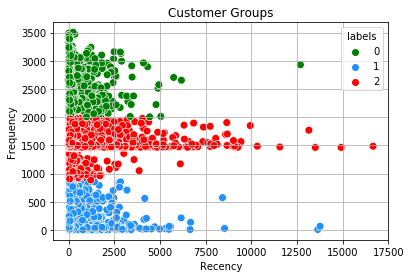

In [70]:
# Visualizing Labels
plt.grid()
sns.scatterplot(y='Recency',x='Monetary',hue='labels',palette=['green','dodgerblue','red'],data=RFM_table,s=60)
plt.title('Customer Groups')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

In [71]:
def segments(data,column1,column2):
    test = data[[column1,column2]]
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler().fit(test)
    test = scaler.transform(test)
    from sklearn.cluster import KMeans
    wcss = []
    for i in range(1,11):
        kmeans= KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(test) #Finds the Kmeans to our data
        wcss.append(kmeans.inertia_)
    print(wcss)
    #Plot Clustering Graph
    plt.grid()
    plt.plot(range(1,11),wcss, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=10)
    plt.title('The Elbow Point Graph')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()
    
    kmeans= KMeans(n_clusters = 3, init = 'k-means++') #initialize the class object
    labels = kmeans.fit_predict(test) #returns a cluster number for each of the data points
    print(labels)
    data['labels'] = labels
    print(data['labels'].value_counts())
    # Visualizing Labels
    plt.grid()
    sns.scatterplot(x=column1,y=column2,hue='labels',palette=['green','dodgerblue','red'],data=data,s=60)
    plt.title('Customer Groups')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

[198.0780428977925, 63.13452222080422, 34.62843774744724, 22.07108726959607, 16.39623144133325, 12.637323541399812, 10.137074701778033, 8.864220653684805, 7.9273533604551805, 7.047208105345354]


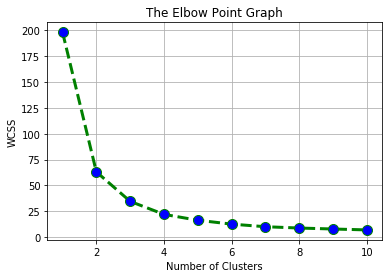

[0 0 0 ... 0 0 0]
0    21194
2     2080
1      546
Name: labels, dtype: int64


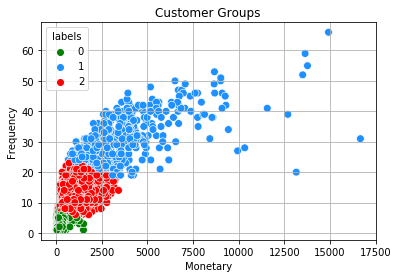

In [72]:
segments(RFM_table,'Monetary','Frequency')

In [73]:
low_cust = RFM_table[RFM_table['labels'] == 0]
med_cust = RFM_table[RFM_table['labels'] == 2]
high_cust = RFM_table[RFM_table['labels'] == 1]

In [74]:
high_cust.head()

,CustomerID,Recency,Frequency,Monetary,labels
41,C12169,1493,43,5631,1
60,C12190,1469,36,2934,1
66,C12196,1920,36,3619,1
81,C12215,24,44,5267,1
168,C12321,1503,37,4027,1


In [75]:
low_patterns = low_cust.quantile(q=[0.25,0.5,0.75])
med_patterns = med_cust.quantile(q=[0.25,0.5,0.75])
high_patterns = high_cust.quantile(q=[0.25,0.5,0.75])

In [76]:
high_patterns

,Recency,Frequency,Monetary,labels
0.25,1470.00,24.0,2063.0,1.0
0.50,1493.00,28.0,2744.5,1.0
0.75,1585.75,34.0,3974.0,1.0


In [77]:
# Arguments (x = value, p = recency, monetary_value, frequency, s = quartiles dict)
def RScore(x,p,s):
    if x <= s[p][0.25]:
        return 4
    elif x <= s[p][0.50]:
        return 3
    elif x <= s[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,k):
    if x <= k[p][0.25]:
        return 1
    elif x <= k[p][0.50]:
        return 2
    elif x <= k[p][0.75]: 
        return 3
    else:
        return 4

In [78]:
#create rfm low_patternsation table
low_cust['R_Score'] = low_cust['Recency'].apply(RScore, args=('Recency',low_patterns,))
low_cust['F_Score'] = low_cust['Frequency'].apply(FMScore, args=('Frequency',low_patterns,))
low_cust['M_Score'] = low_cust['Monetary'].apply(FMScore, args=('Monetary',low_patterns,))

In [79]:
low_cust['RFM_Value'] = low_cust.R_Score.map(str) \
                        + low_cust.F_Score.map(str) \
                         + low_cust.M_Score.map(str)

low_cust.head()

,CustomerID,Recency,Frequency,Monetary,labels,R_Score,F_Score,M_Score,RFM_Value
0,C12116,1566,3,115,0,2,4,4,244
1,C12117,1509,1,41,0,3,1,1,311
2,C12118,1595,1,41,0,2,1,1,211
3,C12119,1554,1,52,0,2,1,2,212
4,C12120,1473,1,31,0,4,1,1,411


In [80]:
low_cust['RFM_Value'].value_counts(ascending=False)

211    2472
311    2429
411    1849
113    1232
112    1072
144    1062
213     964
444     927
413     854
212     784
344     757
111     698
412     694
313     635
312     614
134     496
333     386
244     370
433     369
434     353
133     317
114     303
334     292
234     219
233     217
214     192
414     182
314     120
143      57
343      45
443      44
432      29
131      26
132      25
332      25
243      21
231      13
331      12
232      12
431       9
442       7
142       5
141       2
441       1
241       1
242       1
Name: RFM_Value, dtype: int64

In [81]:
#create rfm med_patternsation table
med_cust['R_Score'] = med_cust['Recency'].apply(RScore, args=('Recency',med_patterns,))
med_cust['F_Score'] = med_cust['Frequency'].apply(FMScore, args=('Frequency',med_patterns,))
med_cust['M_Score'] = med_cust['Monetary'].apply(FMScore, args=('Monetary',med_patterns,))

In [82]:
med_cust['RFM_Value'] = med_cust.R_Score.map(str) \
                        + med_cust.F_Score.map(str) \
                         + med_cust.M_Score.map(str)

med_cust.head()

,CustomerID,Recency,Frequency,Monetary,labels,R_Score,F_Score,M_Score,RFM_Value
14,C12131,1531,19,2452,2,2,4,4,244
18,C12140,1469,10,677,2,3,2,2,322
19,C12141,1472,11,640,2,3,3,2,332
25,C12150,1482,12,578,2,3,3,2,332
36,C12162,1469,12,750,2,3,3,2,332


In [83]:
med_cust['RFM_Value'].value_counts(ascending=False)

111    94
244    77
344    77
311    73
411    72
211    67
412    61
444    58
133    57
144    51
434    50
234    50
433    47
312    47
233    46
112    45
212    44
333    41
422    41
232    40
122    40
432    36
132    34
321    34
343    34
332    34
243    33
222    33
134    32
334    32
       ..
221    28
143    28
421    27
121    27
131    26
123    26
113    24
213    24
423    24
313    24
331    23
443    23
431    18
424    17
124    14
314    14
214    12
324    11
242    11
224    10
342    10
114    10
231    10
442     9
142     7
341     7
141     5
414     5
241     5
441     4
Name: RFM_Value, Length: 64, dtype: int64

In [84]:
#create rfm high_patternsation table
high_cust['R_Score'] = high_cust['Recency'].apply(RScore, args=('Recency',high_patterns,))
high_cust['F_Score'] = high_cust['Frequency'].apply(FMScore, args=('Frequency',high_patterns,))
high_cust['M_Score'] = high_cust['Monetary'].apply(FMScore, args=('Monetary',high_patterns,))


In [85]:
high_cust['RFM_Value'] = high_cust.R_Score.map(str) \
                        + high_cust.F_Score.map(str) \
                         + high_cust.M_Score.map(str)

high_cust.head()

,CustomerID,Recency,Frequency,Monetary,labels,R_Score,F_Score,M_Score,RFM_Value
41,C12169,1493,43,5631,1,3,4,4,344
60,C12190,1469,36,2934,1,4,4,3,443
66,C12196,1920,36,3619,1,1,4,3,143
81,C12215,24,44,5267,1,4,4,4,444
168,C12321,1503,37,4027,1,2,4,4,244


In [86]:
high_cust['RFM_Value'].value_counts(ascending=False)

244    23
444    23
344    21
221    17
144    17
111    17
421    17
321    16
121    15
433    14
112    14
332    13
311    13
211    13
232    13
134    13
413    12
222    12
443    12
412    12
243    11
432    11
411    11
213    10
133    10
212    10
322    10
422     9
343     9
123     9
333     8
312     8
334     8
233     8
122     7
234     7
131     7
323     7
113     7
313     7
331     6
132     6
114     6
434     5
423     5
124     5
223     4
442     4
431     4
342     3
143     3
242     3
314     3
324     2
414     2
241     1
424     1
142     1
224     1
Name: RFM_Value, dtype: int64

In [87]:
dt1 = pd.read_csv('./Test.csv')
dt2 = pd.read_csv('./Customerdata_Test.csv')
dt3 = pd.read_csv('./transactionsdata_Test.csv')
dt4 = pd.read_csv('./Emaildata_Test.csv')

In [88]:
dt1.shape , dt2.shape , dt3.shape , dt4.shape

((5955, 1), (5955, 7), (26768, 4), (129074, 6))

In [89]:
print(dt1.columns)
print(dt2.columns)
print(dt3.columns)
print(dt4.columns)

Index(['CustomerID'], dtype='object')
Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'timestamp', 'OrderQuantity'], dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'timestamp', 'MailOpened',
       'MailClicked'],
      dtype='object')


In [90]:
dt1.nunique()

CustomerID    5955
dtype: int64

In [91]:
dt2.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [92]:
dt3.nunique()

CustomerID        5955
DateOfOrder       2771
timestamp        15326
OrderQuantity      372
dtype: int64

In [93]:
dt4.nunique()

CustomerID      5955
DateOfemail     3149
EmailType          2
timestamp      14366
MailOpened         2
MailClicked        3
dtype: int64

In [94]:
dtest1 = pd.merge(dt1,dt2,on=['CustomerID'],how = 'inner')

In [95]:
dtest1.shape

(5955, 7)

In [96]:
dtest1.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [97]:
dtest1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C12121,CITY1,12/4/2017,1,0,0,Friday
1,C12132,CITY3,10/20/2013,1,0,0,Tuesday
2,C12134,CITY3,9/18/2013,1,0,0,Monday
3,C12135,CITY3,11/1/2017,1,0,1,Wednesday
4,C12136,CITY2,9/28/2013,1,0,0,Thursday


In [98]:
dtest1.isna().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [99]:
len(dtest1)

5955

In [100]:
dtest1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C12121,CITY1,12/4/2017,1,0,0,Friday
1,C12132,CITY3,10/20/2013,1,0,0,Tuesday
2,C12134,CITY3,9/18/2013,1,0,0,Monday
3,C12135,CITY3,11/1/2017,1,0,1,Wednesday
4,C12136,CITY2,9/28/2013,1,0,0,Thursday


In [101]:
dtest1.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [102]:

dt3 = dt3.drop('timestamp',axis=1)

In [103]:
dt3.nunique()

CustomerID       5955
DateOfOrder      2771
OrderQuantity     372
dtype: int64

In [104]:

dt4 = dt4.drop(['timestamp'],axis=1)

In [105]:
dt4.nunique()

CustomerID     5955
DateOfemail    3149
EmailType         2
MailOpened        2
MailClicked       3
dtype: int64

In [106]:
dt4['EmailType'].value_counts()

CustomizedEmail    123119
WelcomeEmail         5955
Name: EmailType, dtype: int64

In [107]:
print(dtest1.columns)
print(dt3.columns)
print(dt4.columns)

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')
Index(['CustomerID', 'DateOfOrder', 'OrderQuantity'], dtype='object')
Index(['CustomerID', 'DateOfemail', 'EmailType', 'MailOpened', 'MailClicked'], dtype='object')


In [108]:
dtest1.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')

In [109]:
dtest2 = pd.merge(dtest1,dt3,on=['CustomerID'],how='right')

In [110]:
dtest2.shape

(26768, 9)

In [111]:
dtest2.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfOrder,OrderQuantity
0,C12121,CITY1,12/4/2017,1,0,0,Friday,2017-12-14,52
1,C12132,CITY3,10/20/2013,1,0,0,Tuesday,2013-10-20,40
2,C12134,CITY3,9/18/2013,1,0,0,Monday,2013-09-18,40
3,C12135,CITY3,11/1/2017,1,0,1,Wednesday,2018-01-10,41
4,C12136,CITY2,9/28/2013,1,0,0,Thursday,2013-10-19,79


In [112]:
dtest2.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
DateOfOrder             2771
OrderQuantity            372
dtype: int64

In [113]:
dt4.columns

Index(['CustomerID', 'DateOfemail', 'EmailType', 'MailOpened', 'MailClicked'], dtype='object')

In [114]:
dt4.shape

(129074, 5)

In [115]:
dt4.nunique()

CustomerID     5955
DateOfemail    3149
EmailType         2
MailOpened        2
MailClicked       3
dtype: int64

In [116]:
dt4['EmailType'].value_counts()

CustomizedEmail    123119
WelcomeEmail         5955
Name: EmailType, dtype: int64

In [117]:
dtest = pd.merge(dtest2,dt4,on=['CustomerID'],how='right')

In [118]:
dtest.shape

(1013740, 13)

In [119]:
dtest.tail()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfOrder,OrderQuantity,DateOfemail,EmailType,MailOpened,MailClicked
1013735,C42167,CITY2,10/28/2016,0,0,0,Monday,2017-04-17,74,2017-08-02,CustomizedEmail,no,no
1013736,C42167,CITY2,10/28/2016,0,0,0,Monday,2017-10-26,103,2017-08-02,CustomizedEmail,no,no
1013737,C42167,CITY2,10/28/2016,0,0,0,Monday,2016-11-08,85,2017-08-02,CustomizedEmail,no,no
1013738,C42167,CITY2,10/28/2016,0,0,0,Monday,2017-11-06,66,2017-08-02,CustomizedEmail,no,no
1013739,C42190,CITY3,9/6/2013,1,0,0,Monday,2013-09-06,40,2013-09-06,WelcomeEmail,yes,NotApplicable


In [120]:
dtest['EmailType'].value_counts()

CustomizedEmail    986972
WelcomeEmail        26768
Name: EmailType, dtype: int64

In [121]:
dtest.isna().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
DateOfOrder             0
OrderQuantity           0
DateOfemail             0
EmailType               0
MailOpened              0
MailClicked             0
dtype: int64

In [122]:
print('Entrées duplicates: {}'.format(dtest.duplicated().sum()))
dtest.drop_duplicates(inplace = True)

Entrées duplicates: 76978


In [123]:
customers_per_city=dtest[['City','CustomerID']].drop_duplicates()
customers_per_city.groupby(['City'])['CustomerID'].agg('count').reset_index().sort_values('CustomerID', ascending=False)

,City,CustomerID
3,CITY4,2278
1,CITY2,1700
2,CITY3,1657
0,CITY1,320


In [124]:
dtest.describe().T

,count,mean,std,min,25%,50%,75%,max
OnlineCommunication,936762.0,0.551845,0.497305,0.0,0.0,1.0,1.0,1.0
AutomaticRefill,936762.0,0.295091,0.456084,0.0,0.0,0.0,1.0,1.0
DoorstepDelivery,936762.0,0.115358,0.319454,0.0,0.0,0.0,0.0,1.0
OrderQuantity,936762.0,91.543871,52.183729,1.0,58.0,80.0,108.0,501.0


In [125]:
print(dtest['DateOfemail'].max())
print(dtest['DateOfemail'].min())

2018-01-21
2008-07-17


In [126]:
print(dtest['DateOfOrder'].max())
print(dtest['DateOfOrder'].min())

2018-01-21
2008-08-05


In [127]:
import datetime as dt
fix = dt.date(2018,1,22)
fix

datetime.date(2018, 1, 22)

In [128]:
dtest['Date_Of_email'] = pd.DatetimeIndex(dtest['DateOfemail']).date

In [129]:
dtest.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfOrder,OrderQuantity,DateOfemail,EmailType,MailOpened,MailClicked,Date_Of_email
0,C12121,CITY1,12/4/2017,1,0,0,Friday,2017-12-14,52,2017-12-04,WelcomeEmail,yes,NotApplicable,2017-12-04
1,C12121,CITY1,12/4/2017,1,0,0,Friday,2017-12-14,52,2017-12-13,CustomizedEmail,yes,no,2017-12-13
2,C12121,CITY1,12/4/2017,1,0,0,Friday,2017-12-14,52,2017-12-13,CustomizedEmail,no,no,2017-12-13
3,C12121,CITY1,12/4/2017,1,0,0,Friday,2017-12-14,52,2017-12-09,CustomizedEmail,no,no,2017-12-09
6,C12121,CITY1,12/4/2017,1,0,0,Friday,2017-12-14,52,2017-12-09,CustomizedEmail,yes,yes,2017-12-09


In [130]:
dtest.loc[dtest['CustomerID'] == 'C12121'][:5]

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfOrder,OrderQuantity,DateOfemail,EmailType,MailOpened,MailClicked,Date_Of_email
0,C12121,CITY1,12/4/2017,1,0,0,Friday,2017-12-14,52,2017-12-04,WelcomeEmail,yes,NotApplicable,2017-12-04
1,C12121,CITY1,12/4/2017,1,0,0,Friday,2017-12-14,52,2017-12-13,CustomizedEmail,yes,no,2017-12-13
2,C12121,CITY1,12/4/2017,1,0,0,Friday,2017-12-14,52,2017-12-13,CustomizedEmail,no,no,2017-12-13
3,C12121,CITY1,12/4/2017,1,0,0,Friday,2017-12-14,52,2017-12-09,CustomizedEmail,no,no,2017-12-09
6,C12121,CITY1,12/4/2017,1,0,0,Friday,2017-12-14,52,2017-12-09,CustomizedEmail,yes,yes,2017-12-09


# Recency Table Test

In [131]:
dtest_r = dtest.drop_duplicates(subset=['Date_Of_email', 'CustomerID'], keep="first")

In [132]:
Recency_test = dtest_r.groupby(by='CustomerID', as_index=False)['Date_Of_email'].max()
Recency_test.columns = ['CustomerID','LastPurchaseDate']
Recency_test.head()

,CustomerID,LastPurchaseDate
0,C12121,2017-12-13
1,C12132,2013-10-20
2,C12134,2013-09-18
3,C12135,2018-01-10
4,C12136,2013-10-19


In [133]:
Recency_test['Recency'] = Recency_test['LastPurchaseDate'].apply(lambda x: (fix - x).days)

In [134]:
Recency_test.head()

,CustomerID,LastPurchaseDate,Recency
0,C12121,2017-12-13,40
1,C12132,2013-10-20,1555
2,C12134,2013-09-18,1587
3,C12135,2018-01-10,12
4,C12136,2013-10-19,1556


In [135]:
Recency_test = Recency_test.drop('LastPurchaseDate',axis=1)

In [136]:
Recency_test.shape

(5955, 2)

# Frequency Table Test

In [137]:
dtest_f = dtest.drop_duplicates(subset=['CustomerID','OrderQuantity'],keep='first')

In [138]:
Frequency_test = dtest_f.groupby(by=['CustomerID'],as_index=False)['OrderQuantity'].count()
Frequency_test.columns = ['CustomerID','Frequency']
Frequency_test.head()

,CustomerID,Frequency
0,C12121,1
1,C12132,1
2,C12134,1
3,C12135,1
4,C12136,1


In [139]:
Frequency_test.shape

(5955, 2)

# Monetary Table Test

In [140]:
Monetary_test = dtest_f.groupby(by=['CustomerID'], as_index=False)['OrderQuantity'].agg({'OrderQuantity':'sum'})
Monetary_test.columns = ['CustomerID','Monetary']
Monetary_test.head()

,CustomerID,Monetary
0,C12121,52
1,C12132,40
2,C12134,40
3,C12135,41
4,C12136,79


In [141]:
rf_table = Recency_test.merge(Frequency_test,on=['CustomerID'])
rf_table.head()

,CustomerID,Recency,Frequency
0,C12121,40,1
1,C12132,1555,1
2,C12134,1587,1
3,C12135,12,1
4,C12136,1556,1


In [142]:
RFM_test = rf_table.merge(Monetary_test,on=['CustomerID'])
RFM_test.head()

,CustomerID,Recency,Frequency,Monetary
0,C12121,40,1,52
1,C12132,1555,1,40
2,C12134,1587,1,40
3,C12135,12,1,41
4,C12136,1556,1,79


In [143]:
RFM_test.shape

(5955, 4)

In [144]:
RFM_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,5955.0,1446.607725,692.668095,1.0,1474.0,1546.0,1675.0,3472.0
Frequency,5955.0,3.160537,5.596566,1.0,1.0,1.0,2.0,65.0
Monetary,5955.0,251.645004,737.549359,1.0,41.0,62.0,155.0,21610.0


[52.465626391840175, 16.728155556513144, 8.5354004220522, 5.825539879124688, 4.003037063488733, 2.8599770930763166, 2.27091428251548, 1.8850541822364975, 1.6211994077304661, 1.392397528349501]


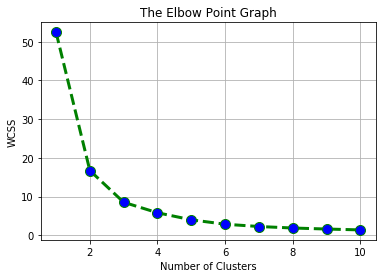

[2 2 2 ... 2 2 2]
2    5305
0     500
1     150
Name: labels, dtype: int64


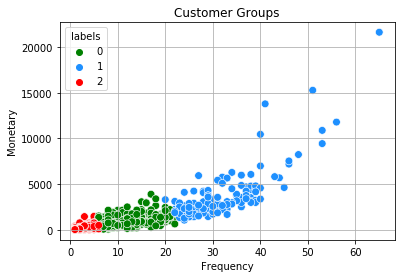

In [145]:
segments(RFM_test,'Frequency','Monetary')

In [146]:
low_test = RFM_test[RFM_test['labels'] == 0]
med_test = RFM_test[RFM_test['labels'] == 2]
high_test = RFM_test[RFM_test['labels'] == 1]

In [147]:
high_test.head()

,CustomerID,Recency,Frequency,Monetary,labels
19,C12219,1465,25,2413,1
43,C12374,1515,32,5772,1
51,C12403,1485,53,9438,1
89,C12594,1833,26,1552,1
201,C13143,1666,26,2576,1


In [148]:
low_ptrn = low_test.quantile(q=[0.25,0.5,0.75])
med_ptrn = med_test.quantile(q=[0.25,0.5,0.75])
high_ptrn = high_test.quantile(q=[0.25,0.5,0.75])

In [149]:
high_ptrn

,Recency,Frequency,Monetary,labels
0.25,1465.00,25.0,1920.25,1.0
0.50,1483.50,29.0,2760.00,1.0
0.75,1541.75,35.0,3946.00,1.0


In [150]:
#create rfm low_ptrnation table
low_test['R_Score'] = low_test['Recency'].apply(RScore, args=('Recency',low_ptrn,))
low_test['F_Score'] = low_test['Frequency'].apply(FMScore, args=('Frequency',low_ptrn,))
low_test['M_Score'] = low_test['Monetary'].apply(FMScore, args=('Monetary',low_ptrn,))

In [151]:
low_test['RFM_Value'] = low_test.R_Score.map(str) \
                        + low_test.F_Score.map(str) \
                         + low_test.M_Score.map(str)

low_test.head()

,CustomerID,Recency,Frequency,Monetary,labels,R_Score,F_Score,M_Score,RFM_Value
20,C12222,1779,15,1922,0,2,4,4,244
26,C12258,1472,19,1724,0,3,4,4,344
61,C12450,6,7,484,0,4,1,1,411
65,C12481,73,9,1063,0,4,2,3,423
82,C12581,1629,14,696,0,2,3,2,232


In [152]:
low_test['RFM_Value'].value_counts(ascending=False)

211    27
344    23
411    21
311    15
111    15
122    15
244    15
144    14
422    13
444    13
243    13
222    12
112    11
133    11
443    10
132    10
312    10
134    10
321    10
322     9
433     9
333     9
234     8
343     8
423     8
432     8
323     8
223     8
413     8
421     8
       ..
121     7
113     6
431     6
342     6
212     6
233     6
224     5
434     5
213     5
324     5
412     5
221     5
332     5
313     5
334     5
114     5
143     4
131     4
442     4
414     3
124     3
214     2
331     2
142     2
242     2
314     2
231     2
441     1
341     1
141     1
Name: RFM_Value, Length: 63, dtype: int64

In [153]:
#create rfm med_ptrnation table
med_test['R_Score'] = med_test['Recency'].apply(RScore, args=('Recency',med_ptrn,))
med_test['F_Score'] = med_test['Frequency'].apply(FMScore, args=('Frequency',med_ptrn,))
med_test['M_Score'] = med_test['Monetary'].apply(FMScore, args=('Monetary',med_ptrn,))

In [154]:
med_test['RFM_Value'] = med_test.R_Score.map(str) \
                        + med_test.F_Score.map(str) \
                         + med_test.M_Score.map(str)

med_test.head()

,CustomerID,Recency,Frequency,Monetary,labels,R_Score,F_Score,M_Score,RFM_Value
0,C12121,40,1,52,2,4,1,2,412
1,C12132,1555,1,40,2,2,1,1,211
2,C12134,1587,1,40,2,2,1,1,211
3,C12135,12,1,41,2,4,1,1,411
4,C12136,1556,1,79,2,2,1,3,213


In [155]:
med_test['RFM_Value'].value_counts(ascending=False)

311    628
211    586
411    485
113    342
144    250
213    249
112    242
444    230
212    199
413    188
111    184
344    172
313    170
412    167
312    140
134    125
244    108
434    100
333     87
433     82
133     79
334     75
114     71
233     71
234     65
414     50
214     41
314     26
143     16
443     16
343     11
131      9
332      8
331      8
132      5
432      4
431      4
231      4
232      3
141      1
142      1
242      1
442      1
341      1
Name: RFM_Value, dtype: int64

In [156]:
#create rfm high_ptrnation table
high_test['R_Score'] = high_test['Recency'].apply(RScore, args=('Recency',high_ptrn,))
high_test['F_Score'] = high_test['Frequency'].apply(FMScore, args=('Frequency',high_ptrn,))
high_test['M_Score'] = high_test['Monetary'].apply(FMScore, args=('Monetary',high_ptrn,))


In [157]:
high_test['RFM_Value'] = high_test.R_Score.map(str) \
                        + high_test.F_Score.map(str) \
                         + high_test.M_Score.map(str)

high_test.head()

,CustomerID,Recency,Frequency,Monetary,labels,R_Score,F_Score,M_Score,RFM_Value
19,C12219,1465,25,2413,1,4,1,2,412
43,C12374,1515,32,5772,1,2,3,4,234
51,C12403,1485,53,9438,1,2,4,4,244
89,C12594,1833,26,1552,1,1,2,1,121
201,C13143,1666,26,2576,1,1,2,2,122


In [158]:
high_test['RFM_Value'].value_counts(ascending=False)

244    9
111    8
444    7
344    6
411    6
211    5
112    5
233    5
333    5
412    5
321    5
343    4
133    4
311    4
422    4
434    4
124    3
121    3
432    3
222    3
223    3
144    3
312    3
212    3
232    3
443    3
243    2
421    2
123    2
332    2
122    2
423    2
113    2
224    2
143    2
331    2
131    2
322    2
424    1
323    1
431    1
234    1
413    1
114    1
242    1
334    1
313    1
132    1
Name: RFM_Value, dtype: int64